In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import missingno as msno

import plotly.express as px
import plotly
import seaborn as sns
sns.set()

os.environ['KMP_DUPLICATE_LIB_OK']='True'

<IPython.core.display.Javascript object>

In [2]:
df = pd.read_csv('data/06-femininity-test.csv', sep='\t')
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,IPC,source,engnat,age,education,gender,orientation,race,religion,hand
0,1,4,1,5,2,5,1,5,1,4,...,1,1,1,18,2,2,2,6,1,1
1,1,5,1,1,1,4,5,1,5,5,...,1,0,1,19,2,1,2,6,1,2
2,1,4,3,3,2,5,2,5,2,3,...,1,0,2,18,2,2,1,1,1,1
3,1,1,4,4,5,4,5,5,4,2,...,1,1,1,19,3,2,1,6,2,1
4,1,2,3,4,3,3,5,1,3,2,...,2,1,1,16,2,1,1,6,2,1


# Preprocessing

**engnat** " Is English you native language?" 1=Yes, 2=No

**age** "What is your age?", entered as text (ages < 13 not recorded)

**education** "How much education have you completed?" 1=Less than high school, 2=High school, 3=University degree, 4=Graduate degree

**gender** 1=Male, 2=Female, 3=Other

**orientation** 1=Heterosexual, 2=Bisexual, 3=Homosexual, 4=Asexual, 5=Other

**race** 1=Mixed race, 2=Asian, 3=Black, 4=Native American, 5=Native Australian, 6=White, 7=Other

**religion** 1=Atheist/Agnostic, 2=Christian, 3=Muslim, 4=Jewish, 5=Hindu, 6=Buddhist, 7=Other

**hand** "What hand do you use to write with?" 1=Right, 2=Left, 3=Both

In [2]:
df.gender = df.gender.map({1: 'Male', 2: 'Female', 3: 'Other'})
df.orientation = df.orientation.map({1:'Heterosexual', 2:'Bisexual', 3:'Homosexual', 4:'Asexual', 5:'Other'})
df.race = df.race.map({1:'Mixed race', 2:'Asian', 3:'Black', 4:'Native American', 5:'Native Australian', 6:'White', 7:'Other'})
df.religion = df.religion.map({1:'Atheist', 2:'Christian', 3:'Muslim', 4:'Jewish', 5:'Hindu', 6:'Buddhist', 7:'Other'})
df.hand = df.hand.map({1:'Right', 2:'Left', 3:'Both'})
df.education = df.education.map({1:'< High School', 2:'High School', 3:'Bachelor Degree', 4:'Graduate degree'})
df.engnat = df.engnat.map({1:'Yes', 2:'No'})
df.source = df.source.map({1:'Google', 2:'Tumblr', 3:'Facebook', 4:'Reddit', 5:'Bing', 0:'Other'})

NameError: name 'df' is not defined

In [ ]:
QUESTION_COLS = [col for col in df.columns if col.startswith('Q')]
NON_QUESTION_COLS = [col for col in df.columns if col not in QUESTION_COLS]

In [ ]:
msno.matrix(df[NON_QUESTION_COLS])

In [3]:
df = df[df.gender.notnull()]

NameError: name 'df' is not defined

In [4]:
questions_dict = {'Q1': 'I have studied how to win at gambling.',
    'Q2': 'I have thought about dying my hair.',
    'Q3': 'I have thrown knives, axes or other sharp things.',
    'Q4': 'I give people handmade gifts.',
    'Q5': 'I have day dreamed about saving someone from a burning building.',
    'Q6': 'I get embarrassed when people read things I have written.',
    'Q7': 'I have been very interested in historical wars.',
    'Q8': 'I know the birthdays of my friends.',
    'Q9': 'I like guns.',
    'Q10': 'I am happiest when I am in my bed.',
    'Q11': 'I did not work very hard in school.',
    'Q12': 'I use lotion on my hands.',
    'Q13': 'I would prefer a class in mathematics to a class in pottery.',
    'Q14': 'I dance when I am alone.',
    'Q15': 'I have thought it would be exciting to be an outlaw.',
    'Q16': 'When I was a child, I put on fake concerts and plays with my friends.',
    'Q17': 'I have considered joining the military.',
    'Q18': 'I get dizzy when I stand up sharply.',
    'Q19': 'I do not think it is normal to get emotionally upset upon hearing about the deaths of people you did not know.',
    'Q20': 'I sometimes feel like crying when I get angry.',
    'Q21': 'I do not remember birthdays.',
    'Q22': 'I save the letters I get.',
    'Q23': 'I playfully insult my friends.',
    'Q24': 'I oppose medical experimentation with animals.',
    'Q25': 'I could do an impressive amount of push ups.',
    'Q26': 'I jump up and down in excitement sometimes.',
    'Q27': 'I think a natural disaster would be kind of exciting.',
    'Q28': 'I wear a blanket around the house.',
    'Q29': 'I have burned things up with a magnifying glass.',
    'Q30': 'I think horoscopes are fun.',
    'Q31': "I don't pack much luggage when I travel.",
    'Q32': 'I have thought about becoming a vegetarian.',
    'Q33': 'I hate shopping.',
    'Q34': 'I have kept a personal journal.',
    'Q35': 'I have taken apart machines just to see how they work.',
    'Q36': 'I take lots of pictures of my activities.',
    'Q37': 'I have played a lot of video games.',
    'Q38': 'I leave nice notes for people now and then.',
    'Q39': 'I have set fuels, aerosols or other chemicals on fire, just for fun.',
    'Q40': 'I really like dancing.',
    'Q41': 'I take stairs two at a time.',
    'Q42': 'I bake sweets just for myself sometimes.',
    'Q43': 'I think a natural disaster would be kind of exciting.',
    'Q44': 'I decorate my things (e.g. stickers on laptop)'
}

In [8]:
df[QUESTION_COLS] = df[QUESTION_COLS].applymap(lambda x: -1.5+0.5*x)

# EDA

In [9]:
sns.set(rc={'axes.facecolor':'#fafafa', 'figure.facecolor':'#fafafa'})

In [10]:
data_no_other_gender = df.query('gender != "Other"')

def flatten(t):
    return [item for sublist in t for item in sublist]

def format_title(title):
    if len(title) > 45:
        words = title.split(' ')
        breakpoint = int(len(words)/2)
        part1 = words[:breakpoint]
        part2 = words[breakpoint:]
        new_title = (' ').join(part1) + '\n' + (' ').join(part2)
        return new_title
    return title
        
format_title(questions_dict['Q43'])

def plot_question(nquestion, ax, hue='gender'):
    sns.histplot(data=data_no_other_gender, x=question, hue=hue, stat="percent", discrete=True,
                 common_norm=False, multiple="dodge", shrink=.8, legend=None, ax=ax)
    
    title = f'{question}: {questions_dict[question]}'
    ax.set_title(f'{question}: {format_title(questions_dict[question])}', fontsize=12, fontfamily='monospace')
    ax.set_ylabel('')
    ax.set_xlabel('')
    #ax.set_xticklabels(['Disagree', 2, 3,4,'Agree'])
    return 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

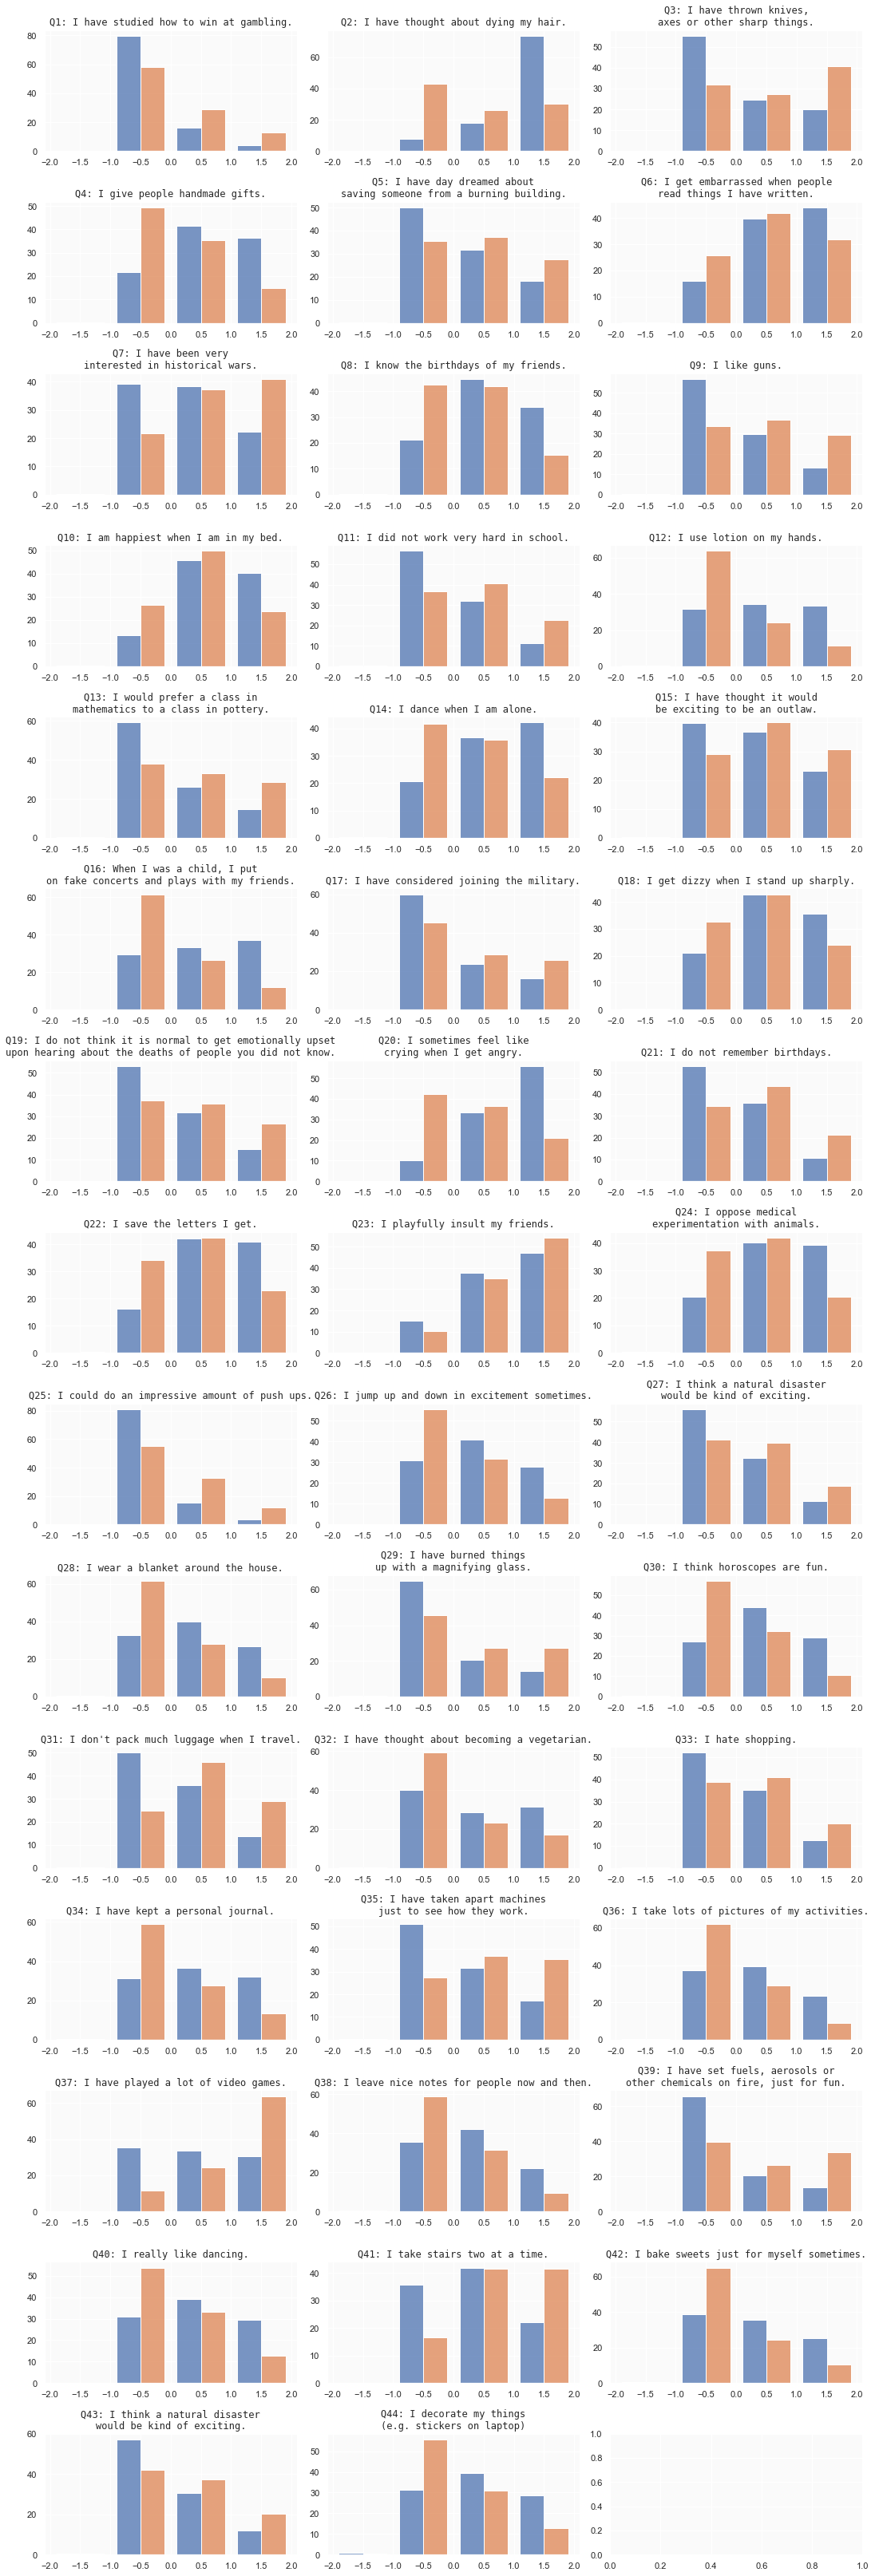

In [103]:
num_plots = len(questions_dict)
n_cols = 3
n_rows = int(np.ceil((num_plots / n_cols)))

fig, axs = plt.subplots(n_rows, n_cols, figsize=(15,45))
fig.patch.set_facecolor('white')
for question, ax in zip(questions_dict, flatten(axs)):
    plot_question(question, ax)
plt.tight_layout()

In [11]:
df[NON_QUESTION_COLS].isnull().sum() / df.shape[0] * 100

introelapse    0.000000
testelapse     0.000000
country        0.000318
IPC            0.000000
source         0.000000
engnat         0.236831
age            0.000000
education      0.687892
gender         0.000000
orientation    1.278060
race           0.673568
religion       2.938106
hand           0.137833
dtype: float64

<AxesSubplot:xlabel='gender', ylabel='race'>

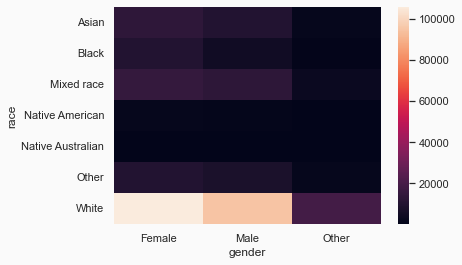

In [12]:
sns.heatmap(df.groupby(['race', 'gender']).count().unstack().Q1)

In [13]:
df.education = df.education.fillna('Unknown')
df.orientation = df.orientation.fillna('Unknown')
df.religion = df.religion.fillna('Unknown')
df.hand = df.hand.fillna('Right')

df = df.drop(['hand', 'country', 'IPC', 'source'], axis=1)

# Predicting gender

In [14]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [15]:
def encode_categorical_variables(data, var_name):
    dummies = pd.get_dummies(data[[var_name]])
    data_plus_dummies = pd.concat([data, dummies], axis=1).drop(var_name, axis=1)
    return data_plus_dummies

In [16]:
temp = df.copy()

for var in tqdm(['education', 'orientation', 'race', 'religion']):
    temp = encode_categorical_variables(temp, var)#.drop(var, axis=1)
    
temp[[col for col in temp.columns if not col.startswith('Q')]].head()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  4.18it/s]


,introelapse,testelapse,engnat,age,gender,education_< High School,education_Bachelor Degree,education_Graduate degree,education_High School,education_Unknown,...,race_Other,race_White,religion_Atheist,religion_Buddhist,religion_Christian,religion_Hindu,religion_Jewish,religion_Muslim,religion_Other,religion_Unknown
0,579,211,Yes,18,Female,0,0,0,1,0,...,0,1,1,0,0,0,0,0,0,0
1,63,242,Yes,19,Male,0,0,0,1,0,...,0,1,1,0,0,0,0,0,0,0
2,24,265,No,18,Female,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,3,231,Yes,19,Female,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,25,274,Yes,16,Male,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0


In [17]:
temp=temp[temp.gender != 'Other']

In [18]:
encoder = LabelEncoder()
temp.engnat = encoder.fit_transform(temp.engnat)

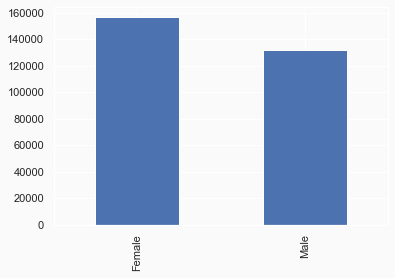

In [19]:
temp.gender.value_counts().plot.bar()
gender_encoder = LabelEncoder()
temp.gender = gender_encoder.fit_transform(temp.gender)

In [130]:
Y_LABEL= 'gender'
temp1 = temp[[*QUESTION_COLS, 'gender']]#.iloc[:100000]

y = temp1[Y_LABEL]
X = temp1.drop(Y_LABEL, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [131]:
for array in [X_train, X_test, y_train, y_test]:
    print(f'{array.shape}')

(230557, 44)
(57640, 44)
(230557,)
(57640,)


In [132]:
lgbm = LGBMClassifier()
lg = LogisticRegression()

In [133]:
lg.fit(X_train, y_train)

LogisticRegression()

In [134]:
preds = lg.predict(X_test)

In [135]:
results = pd.DataFrame({'actuals': y_test, 'preds': preds})

In [136]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score

In [137]:
precision_score(results.actuals, results.preds)

0.8371823557615471

In [138]:
recall_score(results.actuals, results.preds)

0.7940953535966042

In [139]:
roc_auc_score(results.actuals, results.preds)

0.831856021330202

In [140]:
accuracy_score(results.actuals, results.preds)

0.8350451075641915

<AxesSubplot:>

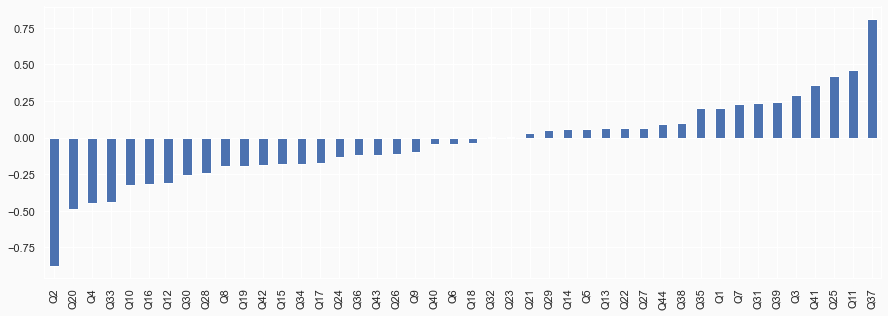

In [141]:
pd.Series(dict(zip(list(X.columns), lg.coef_[0]))).sort_values().plot.bar(figsize=(15,5))

In [ ]:
lgbm.fit(X_train, y_train)